In [2]:
import torch 
import torch.nn as nn
import torchvision
from  torchvision import datasets
from torchvision import models
from torchvision import transforms
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

c:\Users\dagam\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


2.2.0+cu121
0.17.0+cu121


## Import Fashion MNIST

In [34]:
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

print(len(train_data), len(test_data))

60000 10000


In [35]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [36]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [37]:
image, label = train_data[0]
image.shape, label, train_data.targets # one color label

(torch.Size([1, 28, 28]), 9, tensor([9, 0, 0,  ..., 3, 0, 5]))

## Visualize Data

Image shape : torch.Size([1, 28, 28])


(-0.5, 27.5, 27.5, -0.5)

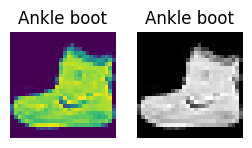

In [38]:
image, label = train_data[0]
print(f"Image shape : {image.shape}")
#plt.imshow(image) # error cause color channel first
fig = plt.figure(figsize=(3, 6))
fig.add_subplot(1, 2, 1)
plt.imshow(image.squeeze())
plt.title(class_names[label])
plt.axis(False)
fig.add_subplot(1, 2, 2)
plt.imshow(image.squeeze(), cmap = 'gray')
plt.title(class_names[label])
plt.axis(False)

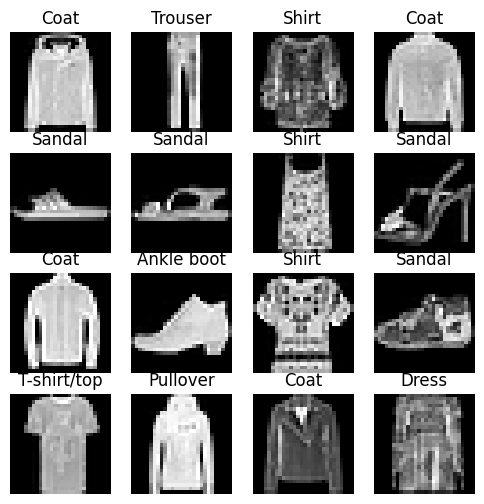

In [39]:
# more images
# torch.manual_seed(42)
fig = plt.figure(figsize=(6,6))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
    rand_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[rand_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(class_names[label])
    plt.axis(False)

## Prepare DataLoader
(Converts dataset into python iterable) + (Batches/mini-Batches)
* Batches(usually 32) = more commputationally efficient(not all hardware can store all in mem in one go) + Gives NN more chances to update its gradients per epoch

In [41]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [48]:
BATCH_SIZE = 32

train_dataloader = DataLoader(dataset = train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True) # Good cause dataset can have similar images nearby
test_dataloader = DataLoader(dataset = test_data,
                              batch_size=BATCH_SIZE,
                              shuffle=False) # For eval its good to not shuffle

In [57]:
print(f"DataLoader: {train_dataloader, test_dataloader}")
print(f"Number of Batches of Train DataLoader: {len(train_dataloader)} batches of {train_dataloader.batch_size}")
print(f"Number of Batches of Test DataLoader : {len(test_dataloader)} batches of {test_dataloader.batch_size}") # gets rounded up if not divisible

DataLoader: (<torch.utils.data.dataloader.DataLoader object at 0x000001D071100910>, <torch.utils.data.dataloader.DataLoader object at 0x000001D070B0D4D0>)
Number of Batches of Train DataLoader: 1875 batches of 32
Number of Batches of Test DataLoader : 313 batches of 32


In [63]:
train_features_batch , train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape # color channels first, varies prob to prob

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 9, label size: torch.Size([])


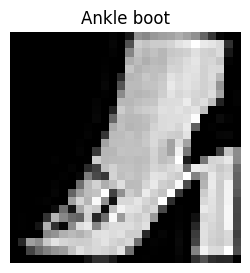

In [80]:
# Show a sample from batch
torch.manual_seed(42)
rand_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[rand_idx], train_labels_batch[rand_idx]
plt.figure(figsize=(3,3))
plt.imshow(img.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## Creating Model